## 4.1 Topological Ordering of Animal Species

In [6]:
import numpy as np

### Load the data

In [146]:
file_path_animal_data = 'data/animals.dat'
file_path_animal_names = 'data/animalnames.txt'
file_path_animal_attributes = 'data/animalattributes.txt'

num_animals = 32
num_attrs = 84

# Open file and read in the array from string to int
raw_data = []
with open(file_path_animal_data, 'r') as file:
    for line in file:
        raw_data = list(map(int, line.split(',')))
        # It should only be a single line but just in case
        break
animal_data = np.array(raw_data).reshape(num_animals, num_attrs)

# Sanity check that we did the reshaping right
for i in range(num_animals):
    for j in range(num_attrs):
        if raw_data[num_attrs*i + j] != data[i, j]:
            print("Error, reshape incorrect!")

# Make translating dictionaries to be lazy later
int_to_animal = []
animal_to_int = {}
with open(file_path_animal_names, 'r') as file:
    for line in file:
        # Make sure we remove unwanted stuff
        name = line.strip("\n").replace("'", "")
        animal_to_int[name] = len(int_to_animal)
        int_to_animal.append(name)

# Fun little fact, some type of messed up formatting
if int_to_animal[1] != "ape":
    print(int_to_animal[1])
    print("ape")
    print(animal_to_int[int_to_animal[1]])


# Make more translating dictionaries to be lazy later
int_to_attr = []
attr_to_int = {}
with open(file_path_animal_attributes, 'r') as file:
    for line in file:
        # Make sure we remove unwanted stuff
        name = line.strip("\n")
        attr_to_int[name] = len(int_to_attr)
        int_to_attr.append(name)

ape	
ape
1


### Train the W

In [173]:
# Init W and start training
W = np.random.uniform(size=(100, 84))
num_epochs = 20
eta = 0.2

# Function that reduces the number of neighbours linearly
def get_neighbours_lin(epoch, winner, max_epoch=20, initial=50, last=0, max_ind=99, min_ind=0):
    step = (initial - last) / max_epoch
    # Maybe don't want to divide by 2 - unclear exactly what lab instructions mean
    current = int((initial - step * epoch)/2)
    lower = max(winner - current, min_ind)
    upper = min(winner + current, max_ind)
    return np.arange(lower, upper + 1)

for epoch in range(num_epochs):
    for ani in range(num_animals):
        winner = np.argmin(np.linalg.norm(W - animal_data[ani], axis=1))
        # Same thing as below
        #test = np.argmin(np.sum(np.power(W - animal_data[ani], 2), axis=0))
        to_update = get_neighbours_lin(epoch, winner, initial=50, last=0)
        
        # Wish this worked:(
        #W[to_update]  += eta*(animal_data[ani] - W[to_update])

        # But do the update with an ugly for loop instead
        for i in range(to_update.size):
            W[to_update[i]] = W[to_update[i]] + eta*(animal_data[ani] - W[to_update[i]])

### Do the inference

In [174]:
# Add each winner per animal
ani_to_som = np.zeros(num_animals)
for ani in range(num_animals):
    ani_to_som[ani] = np.argmin(np.linalg.norm(W - animal_data[ani], axis=1))

# Get a list of indices which would return a sort array
sorted_inds = np.argsort(ani_to_som)
for ani in range(num_animals):
    print(int_to_animal[sorted_inds[ani]])

giraffe	
pig	
camel	
horse
antelop	
elephant	
kangaroo	
rabbit	
rat	
bat	
cat	
lion	
ape	
skunk	
hyena	
dog	
bear	
walrus
crocodile	
seaturtle	
frog	
ostrich	
penguin	
duck	
pelican	
dragonfly	
grasshopper	
beetle	
butterfly	
moskito	
housefly
spider	


## 4.3 Cyclic Tour

### Load the data

In [123]:
file_path_cities = "data/cities.dat"

cities = np.zeros((10, 2))
with open(file_path_cities, 'r') as file:
    lines = file.readlines()
    # Pick the last rows with actual data and extract floats
    for i, line in enumerate(lines[-10:]):
        c_data = line.split(',')
        c_data[1] = c_data[1].replace(";\n", "")
        cities[i] = np.array(list(map(float, c_data)))

### Train the W

In [354]:
W = np.random.uniform(size=(10, 2)) #/ 2 + 0.5
'''
x1 = np.linspace(0.2, 0.8, num=5).reshape(5, 1)
x2_0 = np.ones((5,1)) * 0.3
x2_1 = np.ones((5,1)) * 0.7
w_0 = np.hstack((x1, x2_0))
w_1 = np.hstack((np.flip(x1), x2_1))
W = np.vstack((w_0, w_1))
'''
num_epochs = 20
eta = 0.2

# Function that reduces the number of neighbours linearly
def get_neighbours_lin_circular(epoch, winner, max_epoch=20, initial=2, last=0, max_ind=9, min_ind=0):
    step = (initial - last) / max_epoch
    current = int(round((initial - step * epoch)))
    '''
    if epoch < 3:
        current = 2
    elif epoch < 12:
        current = 1
    else:
        current = 0
    '''
    lower = winner - current
    upper = winner + current
    ret = np.arange(lower, upper + 1)
    # negative indices is fine but not out of bounds indices
    ret = np.where(ret <= max_ind, ret, ret - (max_ind + 1)) 
    return ret

for epoch in range(num_epochs):
    for c in range(10):
        winner = np.argmin(np.linalg.norm(W - cities[c], axis=1))
        # Same thing as below
        #test = np.argmax(np.sum(np.power(W - animal_data[ani], 2), axis=0))
        to_update = get_neighbours_lin_circular(epoch, winner, initial=2, last=0, max_epoch=num_epochs)
        
        # Wish this worked:(
        #W[to_update]  += eta*(animal_data[ani] - W[to_update])

        # But do the update with an ugly for loop instead
        for i in range(to_update.size):
            W[to_update[i]] = W[to_update[i]] + eta*(cities[c] - W[to_update[i]])
        #print("Update {}".format(to_update))

### Do the inference

In [355]:
# Add each winner per animal
city_to_som = np.zeros(10)
for c in range(10):
    city_to_som[c] = np.argmin(np.linalg.norm(W - cities[c], axis=1))
print(city_to_som)
print(W)
print(np.linalg.norm(W - cities[0], axis=1))

[9. 1. 1. 8. 7. 5. 5. 4. 3. 3.]
[[0.25508842 0.25867071]
 [0.20386285 0.19261833]
 [0.4706008  0.23305506]
 [0.64688906 0.26629419]
 [0.80531198 0.36275019]
 [0.77363935 0.57076836]
 [0.71404603 0.77341035]
 [0.47717477 0.9139015 ]
 [0.28258686 0.75792297]
 [0.36801868 0.49922298]]
[0.2351792  0.31876678 0.22235121 0.30413488 0.4133559  0.39459086
 0.45519444 0.47629544 0.33525553 0.06390178]


### Do some fancy plots

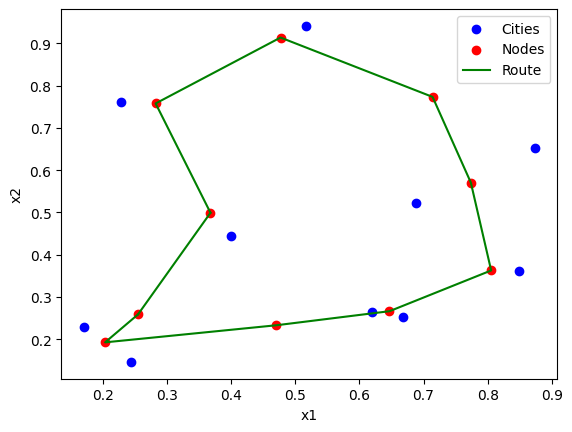

In [356]:
import matplotlib.pyplot as plt

plt.scatter(cities[:, 0], cities[:, 1], color="blue", label="Cities")
plt.scatter(W[:, 0], W[:, 1], color="red", label="Nodes")
plt.plot(W[:, 0], W[:, 1], color="green", label="Route")
plt.plot(W[[9, 0], 0], W[[9, 0], 1], color="green")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

#### Justification
Don't panic about there not being a perfect one-to-one mapping between node and city - at least that's what I tell myself. The route is more of a guideline in what direction to visit the city, since dead nodes and other CL problems make a perfect solution infeasible.

## 4.3 Data Clustering: Votes of MPs

### Load the data

In [358]:
file_path_votes = "data/votes.dat"
file_path_party = "data/mpparty.dat"
file_path_gender = "data/mpsex.dat"
file_path_district = "data/mpdistrict.dat"


# Open file and read in the votes from string to int
raw_data = []
with open(file_path_votes, 'r') as file:
    for line in file:
        raw_data = list(map(float, line.split(',')))
        # It should only be a single line but just in case
        break
votes_data = np.array(raw_data).reshape(349, 31)

# Read in party affiliation
party = np.zeros(349)
with open(file_path_party, 'r') as file:
    lines = file.readlines()
    # Pick the last rows with actual data and extract floats
    for i, line in enumerate(lines[-349:]):
        p_data = line.strip()
        party[i] = np.array(int(p_data))

# Read in gender affiliation
gender = np.zeros(349)
with open(file_path_gender, 'r') as file:
    lines = file.readlines()
    # Pick the last rows with actual data and extract ints
    for i, line in enumerate(lines[-349:]):
        g_data = line.strip()
        gender[i] = np.array(int(g_data))

# Read in district affiliation
district = np.zeros(349)
with open(file_path_district, 'r') as file:
    lines = file.readlines()
    # Pick the last rows with actual data and extract ints
    for i, line in enumerate(lines[-349:]):
        d_data = line.strip()
        district[i] = np.array(int(d_data))

### Train the W

In [374]:
W = np.random.uniform(size=(10, 10, 31))

num_epochs = 20
eta = 0.2

# Function that reduces the number of neighbours linearly
def get_neighbours_lin_square(epoch, winner, max_epoch=20, initial=2, last=0, max_ind=9, min_ind=0):
    step = (initial - last) / max_epoch
    # Square root since we are now in 2d squares
    current = int(round(initial - step * epoch))

    # Get winner row and column - note, very much hardcoded
    row = int(winner/10)
    
    lower_row = max(row - current, min_ind)
    upper_row = min(row + current, max_ind)
    rows = np.arange(lower_row, upper_row + 1)

    col = winner % 10
    lower_col = max(col - current, min_ind)
    upper_col = min(col + current, max_ind)
    cols = np.arange(lower_col, upper_col + 1)

    # Beats me why we need to transpose it to properly get all combos but oh well
    ret = np.array(np.meshgrid(rows, cols)).T.reshape((-1, 2))
    return ret


for epoch in range(num_epochs):
    for mp in range(349):
        winner = np.argmin(np.linalg.norm(W.reshape(100, 31) - votes_data[mp], axis=1))
        to_update = get_neighbours_lin_square(epoch, winner, initial=2, last=0, max_epoch=num_epochs)

        # Do the update with an ugly for loop instead
        for i in range(to_update.shape[0]):
            W[to_update[i, 0], to_update[i, 1]] = W[to_update[i, 0], to_update[i, 1]] + eta*(votes_data[mp] - W[to_update[i, 0], to_update[i, 1]])
        #print("Update {}".format(to_update))

### Do the inference

In [383]:
# Add each winner per animal
mp_to_som = np.zeros((349, 2))
for mp in range(349):
    winner_ind = np.argmin(np.linalg.norm(W.reshape(100, 31) - votes_data[mp], axis=1))
    mp_to_som[mp] = np.array([winner_ind // 10, winner_ind % 10])
mp_to_som = mp_to_som.astype(int)

### Do some really fancy plotting

#### Party affiliation

[[1 1 1 0 1 0 1 0 2 2]
 [1 0 0 0 1 0 0 0 0 0]
 [0 0 3 0 4 0 2 2 2 2]
 [3 0 3 0 3 0 0 0 2 2]
 [3 3 3 0 3 7 0 0 0 0]
 [3 3 0 0 0 0 3 0 7 7]
 [3 3 0 3 0 0 0 6 7 7]
 [3 3 0 0 0 4 0 6 7 7]
 [0 0 5 5 4 4 0 0 0 6]
 [3 0 5 0 4 4 3 6 0 6]]


/tmp/ipykernel_2651/927370532.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  colorbar.set_ticklabels(["no party", "m", "fp", "s", "v", "mp", "kd", "c"])


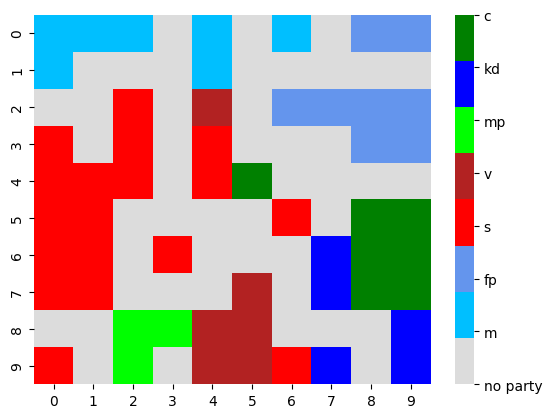

In [410]:
import seaborn as sns
import matplotlib

# First create a messy tensor to see for each grid which party had most votes
mp_party_nums = np.zeros((10, 10, 8))
party = party.astype(int)
# Then iterate through every mp
for mp in range(349):
    mp_party_nums[mp_to_som[mp, 0], mp_to_som[mp, 1], party[mp]] += 1
grid_majority = np.argmax(mp_party_nums, axis=2)
print(grid_majority)
cmap = matplotlib.colors.ListedColormap(["gainsboro","deepskyblue","cornflowerblue", "red", "firebrick", "lime", "blue", "green"])

ax = sns.heatmap(grid_majority, cmap=cmap)
colorbar = ax.collections[0].colorbar
colorbar.set_ticklabels(["no party", "m", "fp", "s", "v", "mp", "kd", "c"])
#plt.legend(labels=["no party", "m", "fp", "s", "v", "mp", "kd", "c"], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Gender

/tmp/ipykernel_2651/2577393305.py:8: RuntimeWarning: invalid value encountered in divide
  grid_majority = mp_gender_tot / mp_gender_counter


[[0.46875    0.         0.27272727        nan 0.33333333        nan
  0.66666667        nan 0.57142857 1.        ]
 [0.                nan        nan        nan 1.                nan
         nan        nan        nan        nan]
 [       nan        nan 0.66666667        nan 1.                nan
  0.42857143 1.         0.5        0.38461538]
 [0.16666667        nan 1.                nan 0.5               nan
         nan        nan 1.         0.66666667]
 [1.         1.         0.5               nan 1.         0.
         nan        nan        nan        nan]
 [0.5        0.                nan        nan        nan        nan
  0.77777778        nan 0.         0.25      ]
 [0.         0.50961538        nan 0.5               nan        nan
         nan 0.         0.         0.7       ]
 [1.         0.                nan        nan        nan 0.66666667
         nan 0.75       0.         0.5       ]
 [       nan        nan 0.33333333 0.         0.5        0.6
         nan        nan    

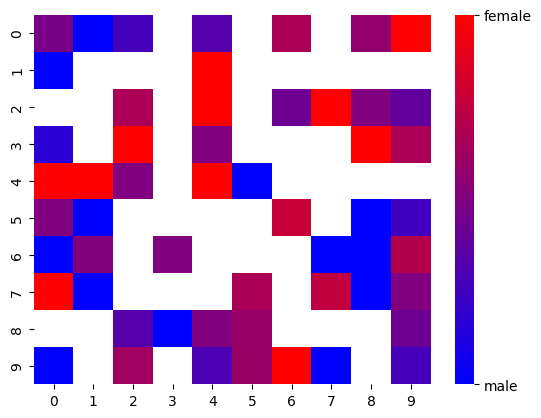

In [419]:
# First create a messy tensor to see for each grid which gender had most votes
mp_gender_tot = np.zeros((10, 10))
mp_gender_counter = np.zeros((10, 10))
# Then iterate through every mp
for mp in range(349):
    mp_gender_tot[mp_to_som[mp, 0], mp_to_som[mp, 1]] +=  gender[mp]
    mp_gender_counter[mp_to_som[mp, 0], mp_to_som[mp, 1]] += 1
grid_majority = mp_gender_tot / mp_gender_counter
print(grid_majority)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue", "red"])

ax = sns.heatmap(grid_majority, cmap=cmap)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(["male", "female"])
#plt.legend(labels=["no party", "m", "fp", "s", "v", "mp", "kd", "c"], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### District

[[ 1  3  5  0  1  0  1  0  1  3]
 [29  0  0  0 28  0  0  0  0  0]
 [ 0  0  2  0  6  0  1  2  4  2]
 [ 5  0 21  0  7  0  0  0  2  5]
 [ 8  4 16  0  2 19  0  0  0  0]
 [ 1  1  0  0  0  0  2  0 23  2]
 [19  2  0 13  0  0  0  6 27  3]
 [23 28  0  0  0 21  0  2 24 13]
 [ 0  0 18  1  5  4  0  0  0  1]
 [ 4  0  2  0  1  1  2  3  0  1]]


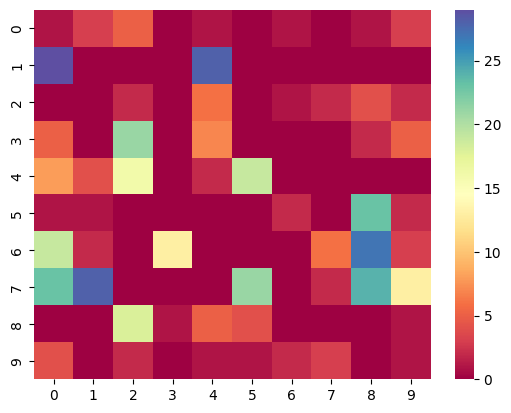

In [425]:
# First create a messy tensor to see for each grid which party had most votes
mp_dist_nums = np.zeros((10, 10, 30))
district = district.astype(int)
# Then iterate through every mp
for mp in range(349):
    mp_dist_nums[mp_to_som[mp, 0], mp_to_som[mp, 1], district[mp]] += 1
grid_majority = np.argmax(mp_dist_nums, axis=2)
print(grid_majority)
#cmap = matplotlib.colors.ListedColormap(["gainsboro","deepskyblue","cornflowerblue", "red", "firebrick", "lime", "blue", "green"])
cmap = sns.color_palette("Spectral", as_cmap=True)
ax = sns.heatmap(grid_majority, cmap=cmap)

#plt.legend(labels=["no party", "m", "fp", "s", "v", "mp", "kd", "c"], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()